In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import re
import glob
import pandas as pd

sys.path.append("/home/bach/Desktop/work/classification_of_light_curves/src")
sys.path.append("/home/bach/Desktop/work/classification_of_light_curves/")

from src.data.filters import *
from src.config import FilterConfig, PACKAGE_PATH
from src.data.plot_light_curve import plot_curves

In [2]:
DATA_PATH = PACKAGE_PATH + "/../Fall_2021_csv"
#DATA_PATH = PACKAGE_PATH + "/../MMT_9_2_2023"

FILTER_CFG = FilterConfig(
    n_bins=30,
    n_gaps=2,
    gap_size=10,
    non_zero_ratio=0.8,
    rms_ratio=0
)

In [7]:
def load_csv_file(name, path=DATA_PATH, regex=r'.*'):
    data = {}
    for filename in glob.iglob(f"{path}/*{name}*.csv"):
        name = os.path.split(filename)[1][:-(len(".csv"))]
        if re.search(regex, name):
            df = pd.read_csv(filename)
            data[name] = df
    return data

def arg_filter_data(data, filter_cfg, start_index=3):
    to_filter = data.iloc[:, start_index:].to_numpy()
    ok_c = get_filter_continuous(to_filter, n_bins=filter_cfg.n_bins, gap=filter_cfg.n_gaps, continous_gap=filter_cfg.gap_size)
    ok_nz = get_filter_ratio(to_filter, ratio=filter_cfg.non_zero_ratio)
    ok = np.logical_and(ok_c, ok_nz)
    if filter_cfg.rms_ratio != 0:
        ok = np.logical_and(ok,get_rms_filter(to_filter, rms_ratio=filter_cfg.rms_ratio))

    filtered_data = data[ok]

    return ok, ok_c, ok_nz

def arg_filter_data_2(data, filter_cfg):
    to_filter = data
    ok_c = get_filter_continuous(to_filter, n_bins=filter_cfg.n_bins, gap=filter_cfg.n_gaps, continous_gap=filter_cfg.gap_size)
    ok_nz = get_filter_ratio(to_filter, ratio=filter_cfg.non_zero_ratio)
    ok = np.logical_and(ok_c, ok_nz)
    if filter_cfg.rms_ratio != 0:
        ok = np.logical_and(ok,get_rms_filter(to_filter, rms_ratio=filter_cfg.rms_ratio))

    filtered_data = data[ok]

    return ok, ok_c, ok_nz

In [4]:

atlas = "atlas"
falcon = "falcon_9"
h2a = "h2a"
cz3 = "cz_3"
globalstar = "globalstar"

regexes = {
    atlas: r'^ATLAS_5_CENTAUR_R.B$',
    falcon: r'FALCON_9.*',
    h2a: r'H-2A.*B',
    cz3: r'CZ-3B.*',
    globalstar: r'^GLOBALSTAR'
}

In [18]:

FILTER_CFG = FilterConfig()
FILTER_CFG.n_bins = 30
FILTER_CFG.n_gaps = 10
FILTER_CFG.gap_size = 10
FILTER_CFG.rms_ratio = .0
FILTER_CFG.non_zero_ratio = 0.6

NAME = cz3

In [19]:


d = load_csv_file("", regex=regexes[NAME])
print(d.keys())

n_data = pd.concat(list(d.values()))
ok, ok_c, ok_nz = arg_filter_data(n_data, FILTER_CFG, start_index=3)

print(f"Total number:     {len(ok)}")
print(f"Continous filter: {np.sum(ok_c)}")
print(f"NonZero filter:   {np.sum(ok_nz)}")
print(f"All filters:      {np.sum(ok)}")


dict_keys(['CZ-3B_R|B'])
Total number:     26624
Continous filter: 20667
NonZero filter:   15225
All filters:      15147


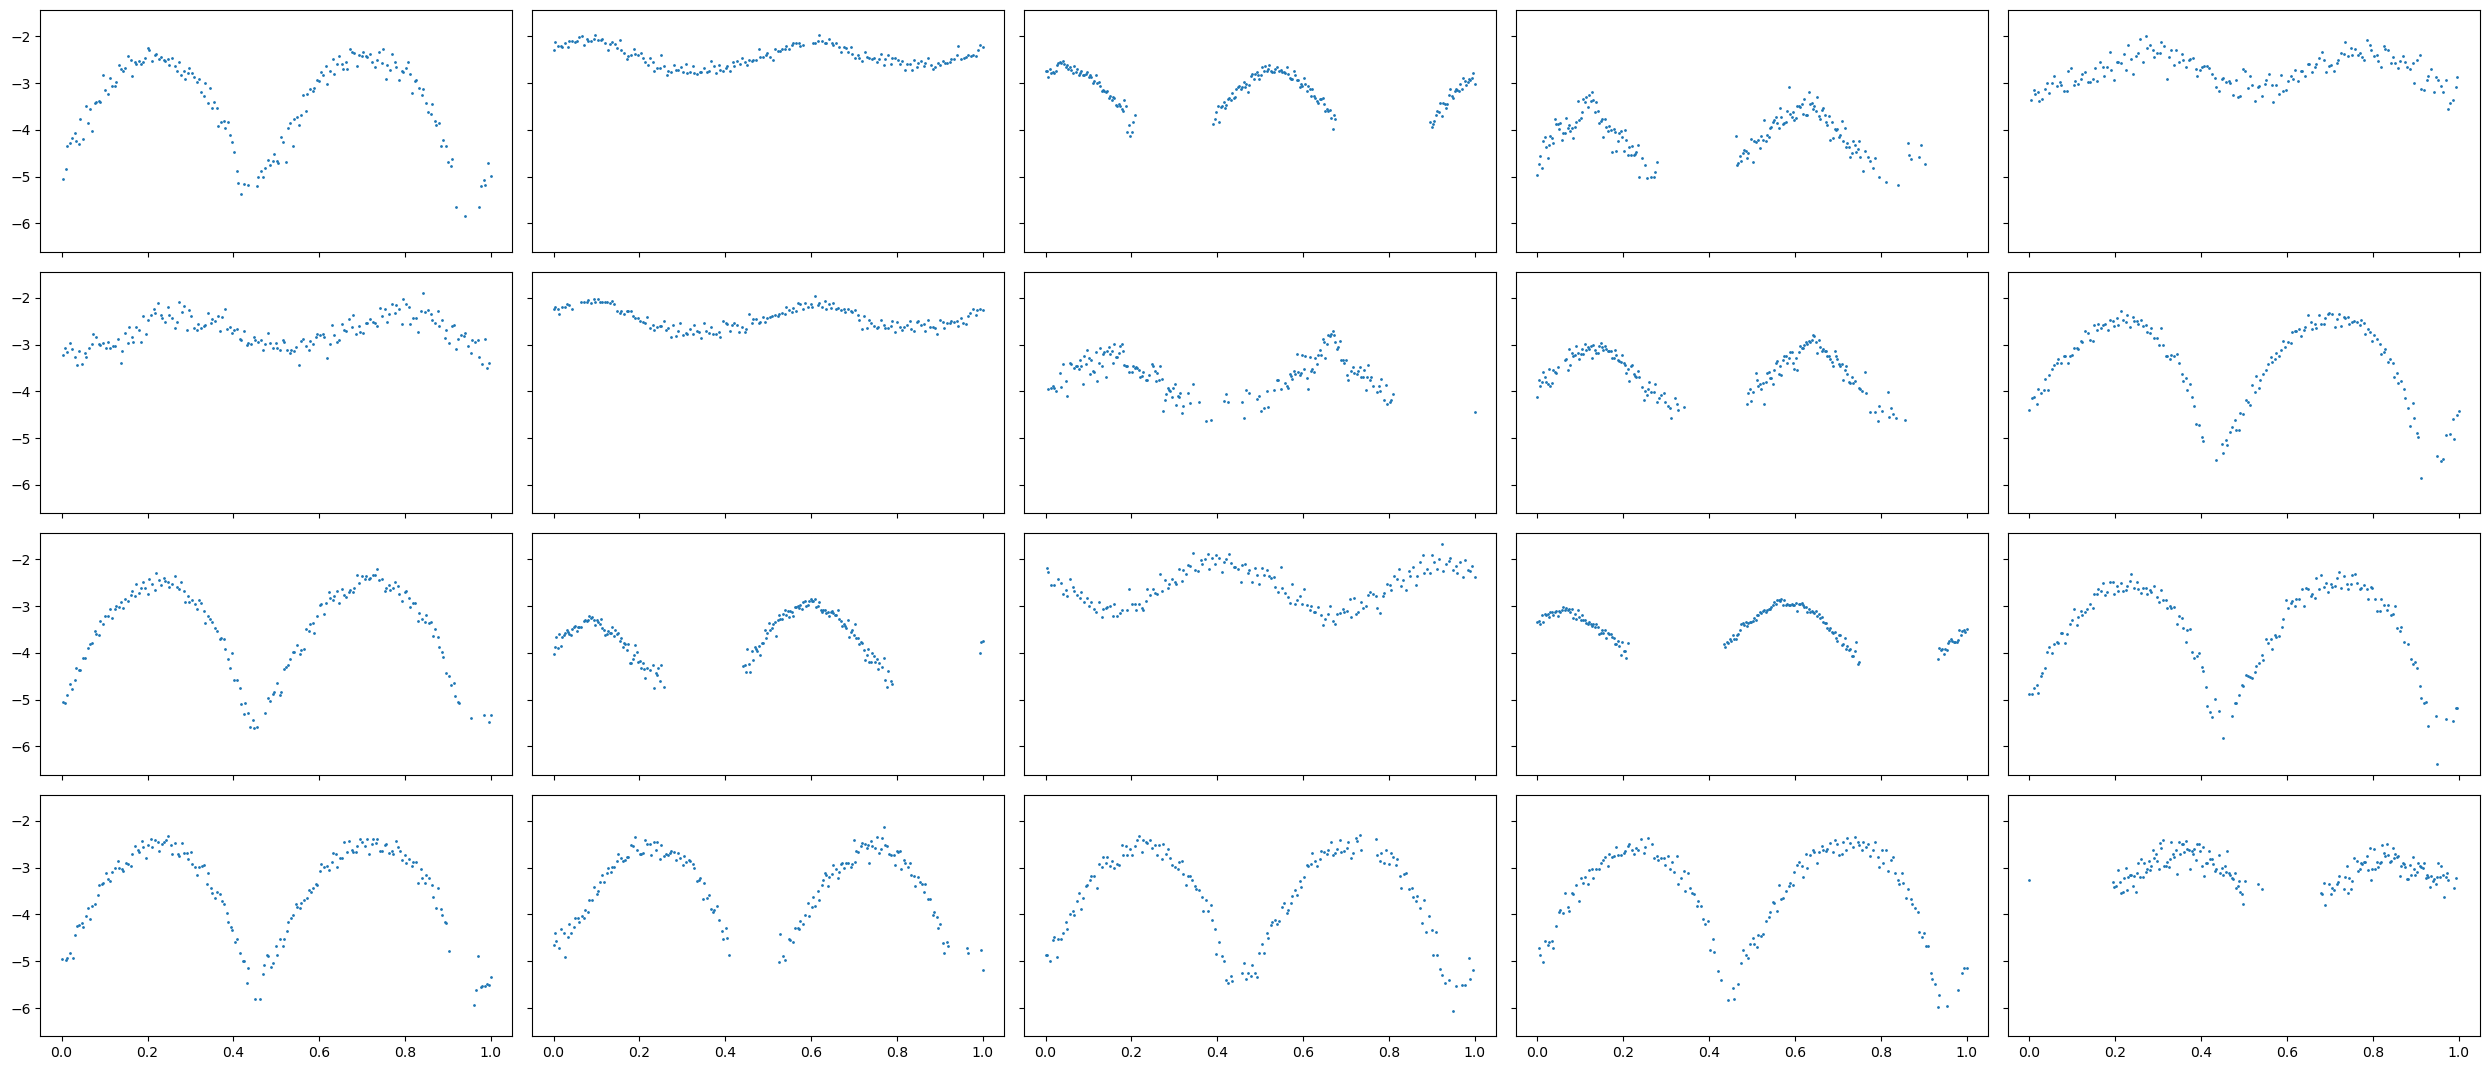

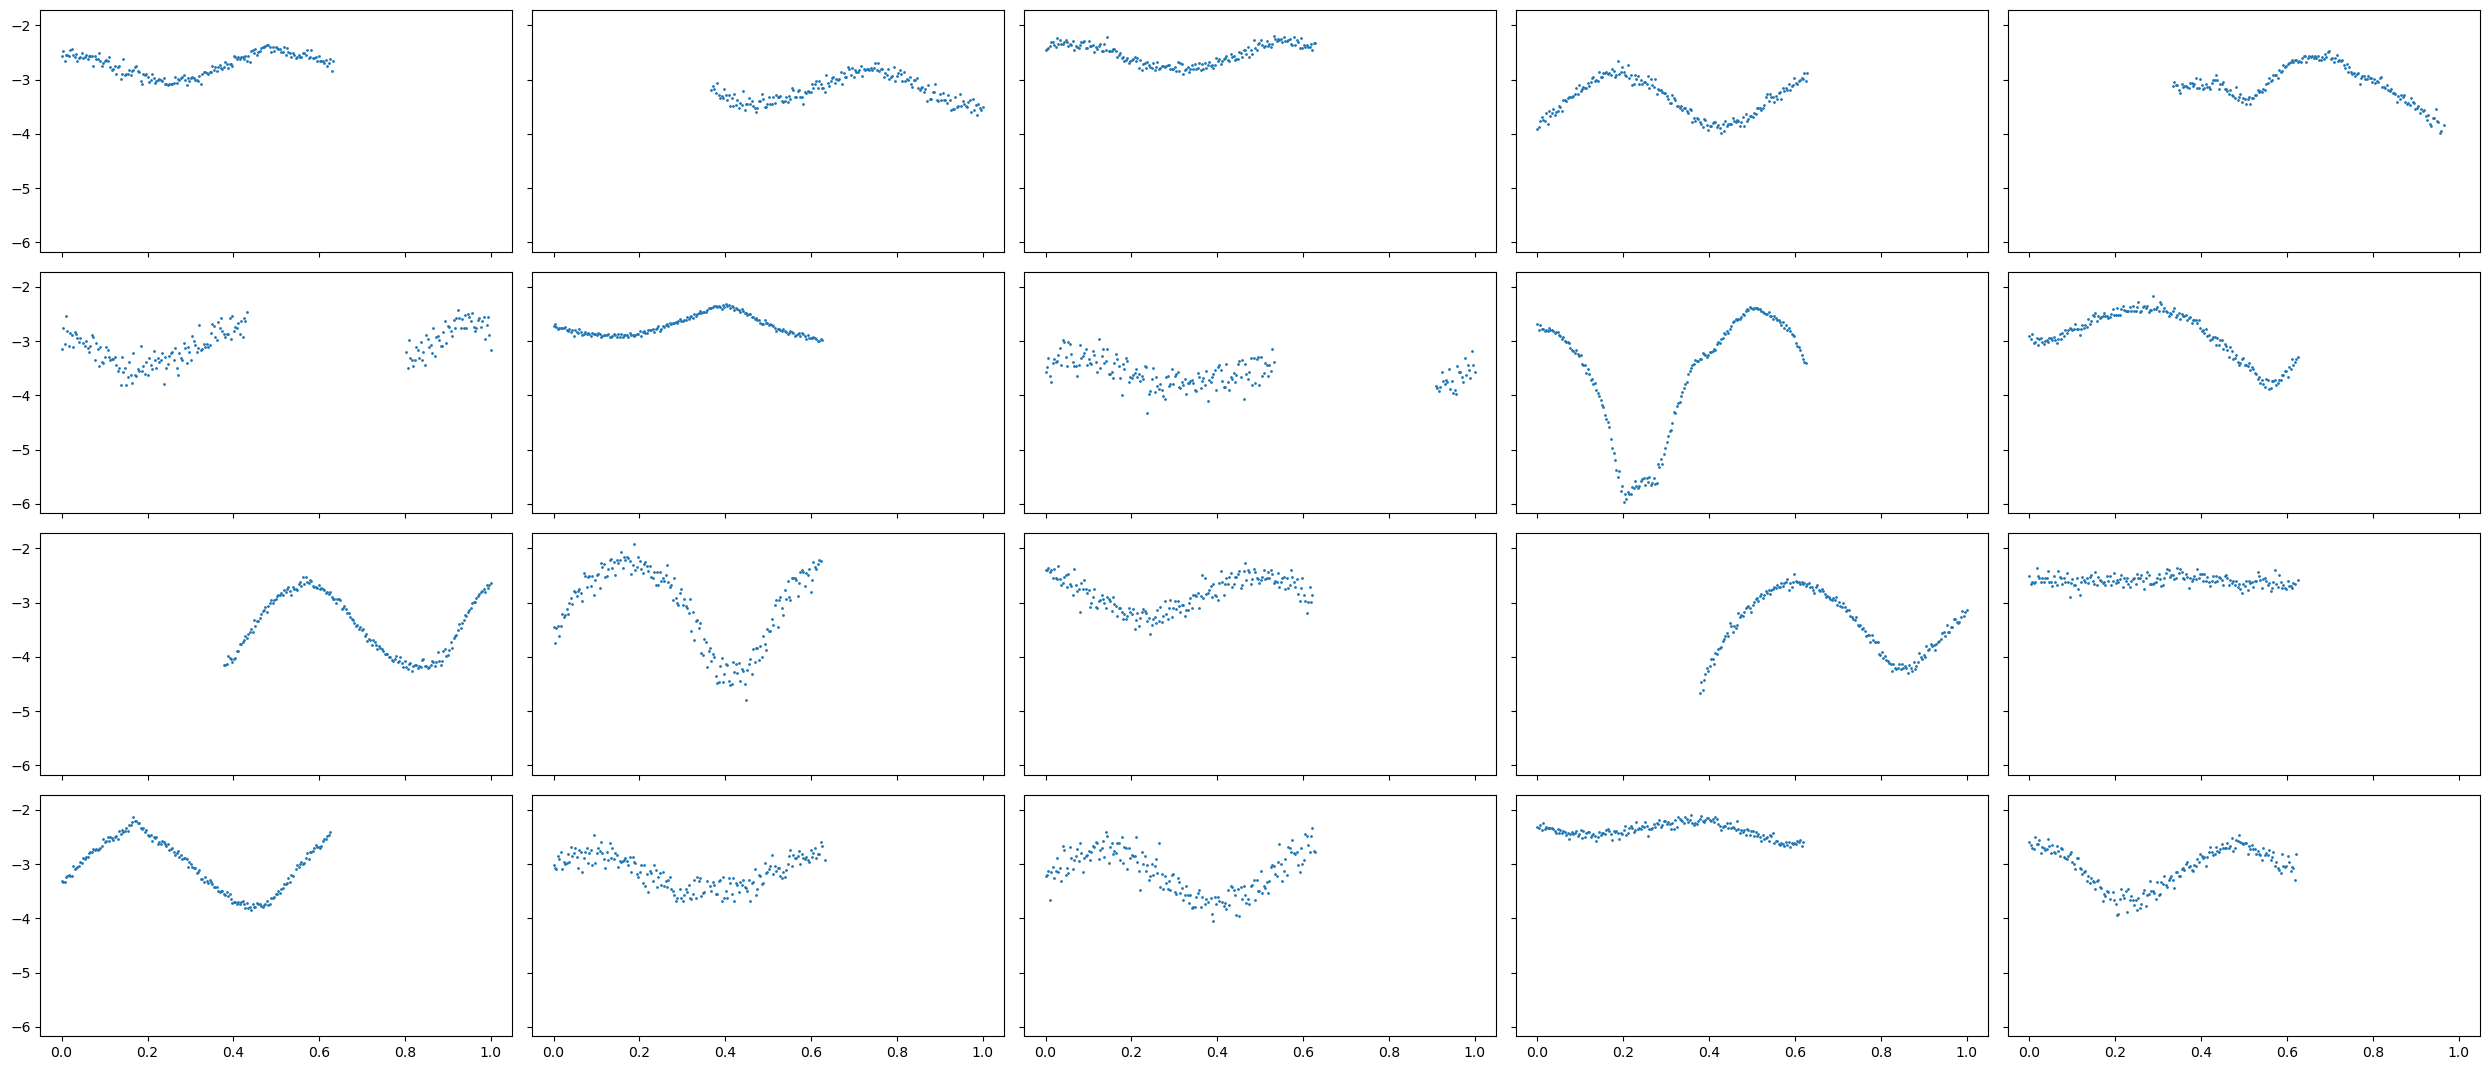

In [20]:
indices = ok

arr = n_data.to_numpy()[:, 3:][indices]

i2 = np.argsort(np.sum(arr != 0, axis=1))

plot_curves(-arr[i2][:20], n_cols=5)

arr = n_data.to_numpy()[:, 3:][np.logical_not(indices)]

i2 = np.argsort(-np.sum(arr != 0, axis=1))

plot_curves(-arr[i2][:20], n_cols=5)

In [45]:
for name in [falcon, atlas, cz3, h2a, globalstar]:
    d = load_csv_file("", regex=regexes[name])
    n_data = pd.concat(list(d.values()))

    print(n_data.to_numpy()[:, 3:].shape, name)

    np.save(f"{PACKAGE_PATH}/resources/mmt_13_3_2023/{name}.npy", n_data.to_numpy()[:, 3:])



(5660, 300) falcon_9
(16704, 300) atlas
(26624, 300) cz_3
(5863, 300) h2a
(42174, 300) globalstar


In [8]:
n_data = np.load(f"{PACKAGE_PATH}/resources/mmt_13_3_2023/{falcon}.npy")

ok, ok_c, ok_nz = arg_filter_data_2(n_data, FILTER_CFG)

print(f"Total number:     {len(ok)}")
print(f"Continous filter: {np.sum(ok_c)}")
print(f"NonZero filter:   {np.sum(ok_nz)}")
print(f"All filters:      {np.sum(ok)}")


Total number:     5660
Continous filter: 1974
NonZero filter:   2207
All filters:      1953
